<a href="https://colab.research.google.com/github/Vice10/ds_notebooks/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
import sklearn 
%matplotlib inline

In [ ]:
churn = pd.read_csv("./churn.csv")
churn.drop('customerID', axis=1, inplace=True)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
for col in churn:
  print(col, len(churn[pd.to_numeric(churn[col], errors='coerce').isna()]))

gender 7043
SeniorCitizen 0
Partner 7043
Dependents 7043
tenure 0
PhoneService 7043
MultipleLines 7043
InternetService 7043
OnlineSecurity 7043
OnlineBackup 7043
DeviceProtection 7043
TechSupport 7043
StreamingTV 7043
StreamingMovies 7043
Contract 7043
PaperlessBilling 7043
PaymentMethod 7043
MonthlyCharges 0
TotalCharges 11
Churn 7043


In [ ]:
churn = churn[churn['TotalCharges'] != " "]
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])
print(churn.shape, churn['TotalCharges'].dtypes)

(7032, 20) float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for col in churn:
  if churn[col].dtypes == 'object':
    print(col, churn[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
churn.replace('No phone service', 'No', inplace=True)
churn.replace('No internet service', 'No', inplace=True)

In [ ]:
enc_cat = ['Partner','Dependents','PhoneService', 'MultipleLines',
           'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for cat in enc_cat:
   churn[cat].replace({'Yes': 1, 'No': 0}, inplace=True)
churn['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
for col in churn:
  if churn[col].dtypes == 'object':
    print(col, churn[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
dum_enc = ['InternetService','Contract','PaymentMethod']
churn = pd.get_dummies(data=churn, columns=dum_enc)
print(churn.shape,"\n", churn.dtypes)


(7032, 27) 
 gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No

In [ ]:
print(churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

churn[cols_to_scale] = mms.fit_transform(churn[cols_to_scale])

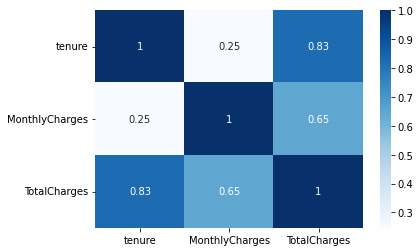

In [ ]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(churn[cols_to_scale].corr(), annot=True, cmap = 'Blues')
plt.show()

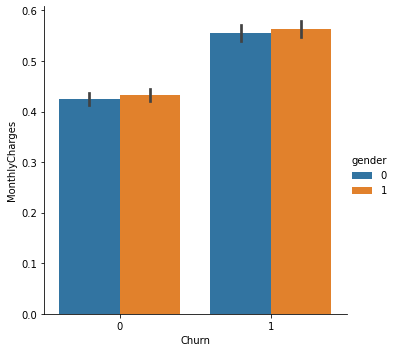

In [ ]:
sns.catplot(x="Churn", y="MonthlyCharges", hue="gender", kind="bar", data=churn, )


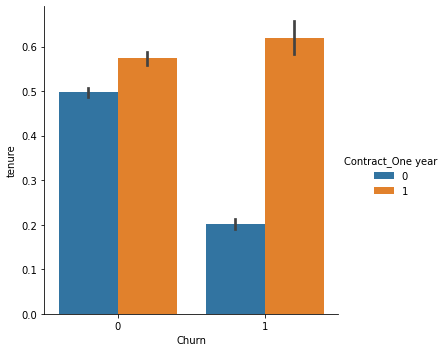

In [ ]:
sns.catplot(x="Churn", y="tenure", hue="Contract_One year", kind="bar", data=churn)

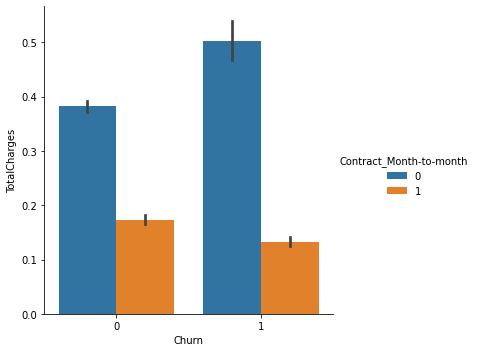

In [ ]:
sns.catplot(x="Churn", y="TotalCharges", hue="Contract_Month-to-month", kind="bar", data=churn)


In [ ]:
X = churn.drop('Churn', axis=1)
y = churn['Churn'].copy()
len(churn[churn['Churn'] == 0]) / len(churn)

0.7342150170648464

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
print(X.shape, y.shape)
print(X_sm.shape, y_sm.shape)

(7032, 26) (7032,)
(10326, 26) (10326,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                            X_sm, y_sm, test_size=0.2, random_state=100)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
evalset = [(X_train, y_train), (X_test,y_test)]
model = XGBClassifier(n_estimators=2000)
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset, verbose=False)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.98%


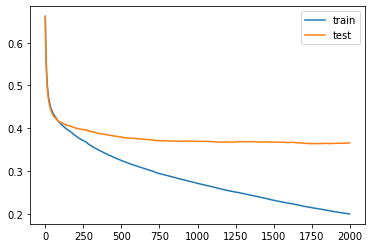

In [ ]:
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))
scores

Mean ROC AUC: 0.81661


array([0.8326317 , 0.81383237, 0.8101277 , 0.78854206, 0.81553911,
       0.79739253, 0.83062845, 0.806471  , 0.83205862, 0.8205758 ,
       0.78514983, 0.84859173, 0.81202034, 0.80263649, 0.86497326,
       0.82308896, 0.82142043, 0.80869917, 0.8158552 , 0.81460121,
       0.82047808, 0.81027938, 0.83307336, 0.82147743, 0.79876052,
       0.81132115, 0.82593376, 0.80305103, 0.79738217, 0.83157671])

Guess: ROC AUC=0.504
Logistic: ROC AUC=0.918


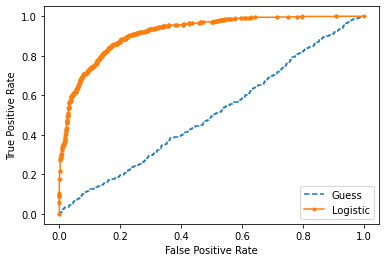

In [ ]:
lr_probs = model.predict_proba(X_test)[:, 1]
# calculate scores
ns_probs = [_ for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Guess: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Guess')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

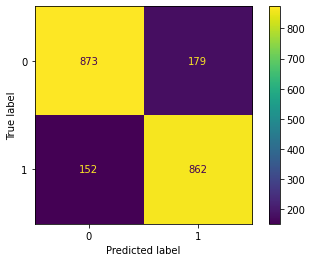

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

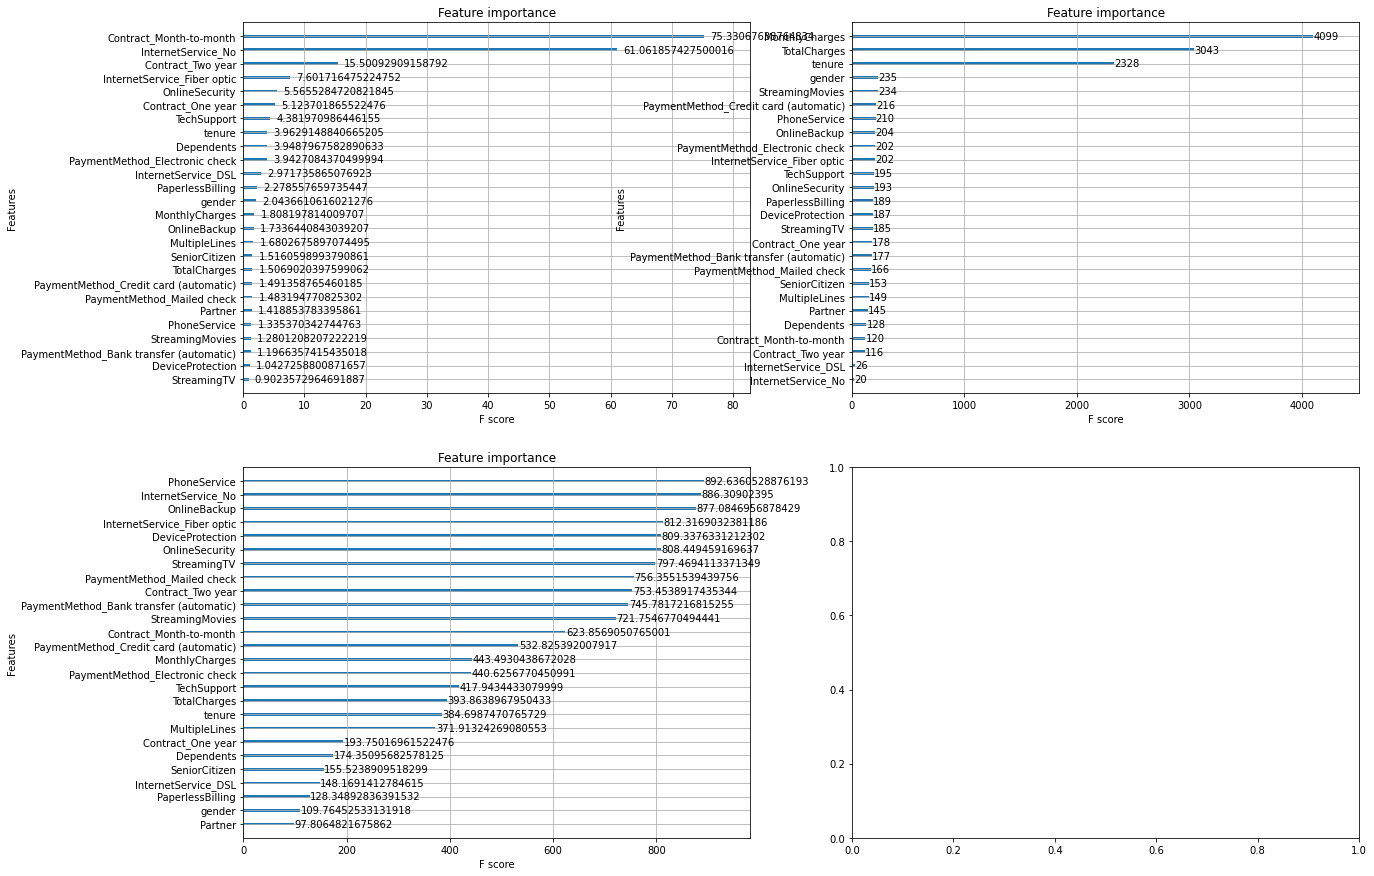

In [ ]:
from xgboost import plot_importance
fig, axs = plt.subplots(2,2, figsize=(20,15))
# average gain of splits which use the feature
plot_importance(model,importance_type='gain',ax=axs[0,0])
# number of times a feature is used to split data
plot_importance(model,importance_type='weight',ax=axs[0,1])
# how many times feature is used in trees
plot_importance(model,importance_type='cover',ax=axs[1,0])

In [ ]:
!pip install shap

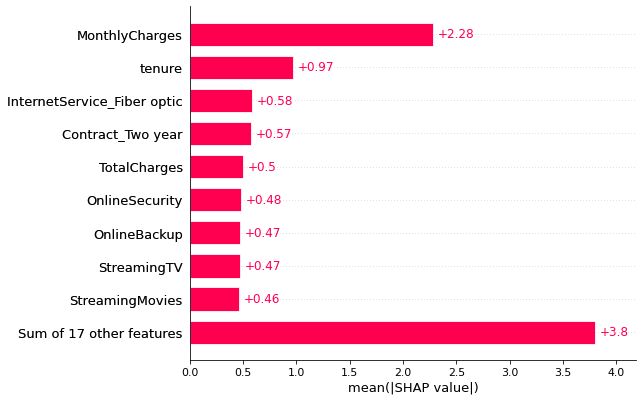

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.bar(shap_values)

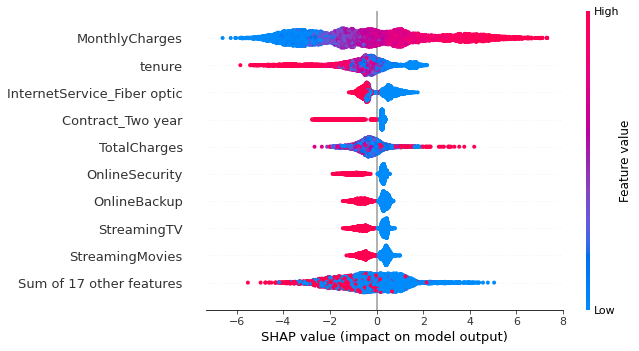

In [ ]:
shap.plots.beeswarm(shap_values)

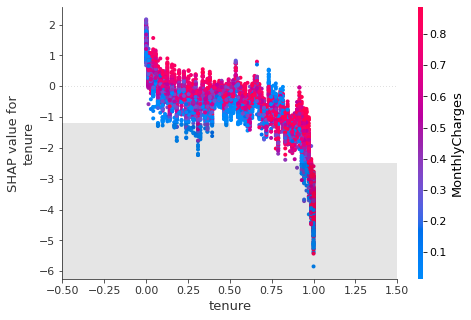

In [ ]:
shap.plots.scatter(shap_values[:,"tenure"], color=shap_values)

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000,:])

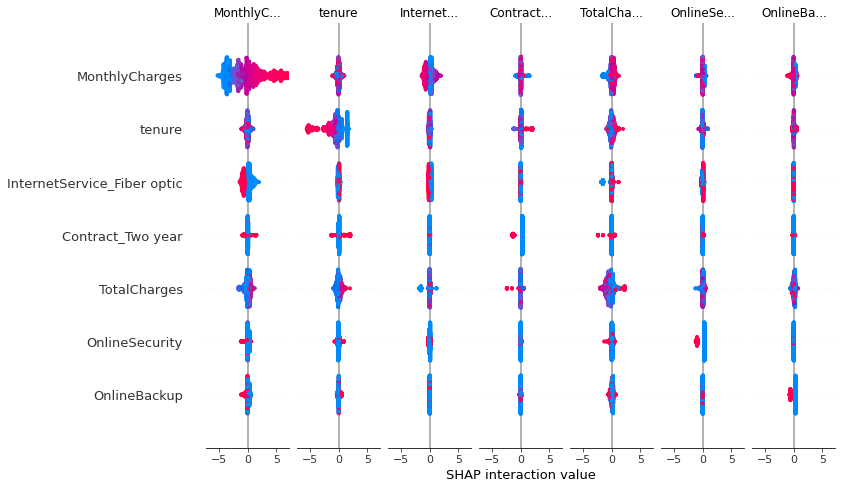

In [ ]:
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])

### Multiclass championship

In [ ]:
seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t')
seeds = seeds.sample(frac=1).reset_index(drop=True)
y = seeds['Var']
X = seeds.drop(columns='Var')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.2, random_state=100)

In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
evalset = [(X_train, y_train), (X_test,y_test)]
model = OneVsRestClassifier(XGBClassifier(n_estimators=200))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, predictions,labels=[1, 2, 3]))

Accuracy: 85.71%
              precision    recall  f1-score   support

           1       0.86      0.75      0.80        16
           2       0.82      1.00      0.90         9
           3       0.88      0.88      0.88        17

    accuracy                           0.86        42
   macro avg       0.85      0.88      0.86        42
weighted avg       0.86      0.86      0.85        42

